In [43]:
import numpy as np

a = np.arange(-10, 12, 3)
d = a
print(a, type(a))

b = np.where(a>0)
print(list(zip(*np.where(a > 4))))
print(a[b[0]])


[-10  -7  -4  -1   2   5   8  11] <class 'numpy.ndarray'>
[(5,), (6,), (7,)]
[ 2  5  8 11]


In [1]:
import pytplot
pytplot.__path__

['/home/www/.local/lib/python3.8/site-packages/pytplot']

In [12]:
import numpy as np
import pytplot, pyspedas
from pytplot import tplot
detail_data = np.arange(10)
rough_data = np.arange(0,10, 3)
print(detail_data, rough_data)
pytplot.store_data('detail_data', data = {'x': detail_data, 'y': detail_data})
pytplot.store_data('rough_data', data = {'x': rough_data, 'y': rough_data})
pytplot.tplot_names()

[0 1 2 3 4 5 6 7 8 9] [0 3 6 9]
0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp
3 : tinterpol_test-itrp
4 : detail_data
5 : rough_data
6 : rough_data-itrp


['tinterpol_test',
 'tinterpol_test1',
 'tinterpol_test1-itrp',
 'tinterpol_test-itrp',
 'detail_data',
 'rough_data',
 'rough_data-itrp']

In [13]:
pyspedas.tinterpol('rough_data', interp_to='detail_data')


tinterpol (linear) was applied to: rough_data-itrp


In [14]:
x = pytplot.get_data('rough_data')
y = pytplot.get_data('detail_data')
z = pytplot.get_data('rough_data-itrp')
x,y,z

(variable(times=array([0, 3, 6, 9]), y=array([0, 3, 6, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])))

In [16]:
import load 


In [23]:
importer = load.orb(trange=['2000-01-01', '2000-01-02'])

In [24]:
import pytplot
pytplot.tplot_names()

0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp
3 : tinterpol_test-itrp
4 : detail_data
5 : rough_data
6 : rough_data-itrp
7 : akb_Pass
8 : akb_ILAT
9 : akb_MLAT
10 : akb_MLT
11 : akb_ALT


['tinterpol_test',
 'tinterpol_test1',
 'tinterpol_test1-itrp',
 'tinterpol_test-itrp',
 'detail_data',
 'rough_data',
 'rough_data-itrp',
 'akb_Pass',
 'akb_ILAT',
 'akb_MLAT',
 'akb_MLT',
 'akb_ALT']

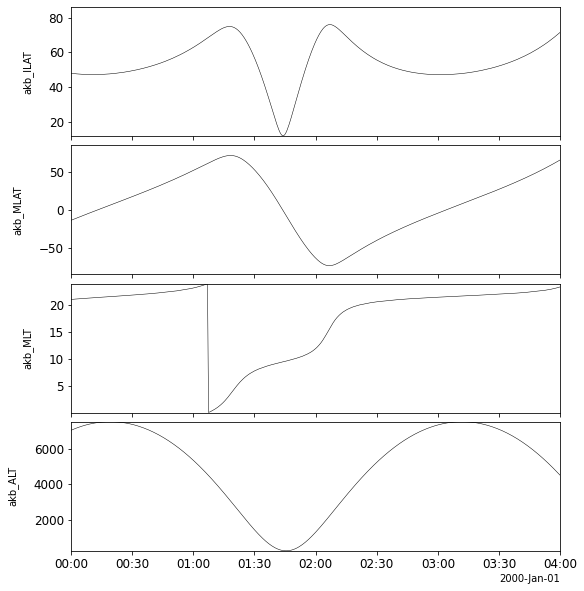

In [27]:
pytplot.tlimit(['2000-01-01 00:00:00', '2000-01-01 04:00:00'])
pytplot.tplot(['akb_ILAT', 'akb_MLAT', 'akb_MLT', 'akb_ALT'])

13-Jul-22 16:12:23: /home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),

13-Jul-22 16:12:23: /home/www/.local/lib/python3.8/site-packages/pytplot/MPLPlotter/tplot.py:236: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  this_axis.set_ylim(yrange)



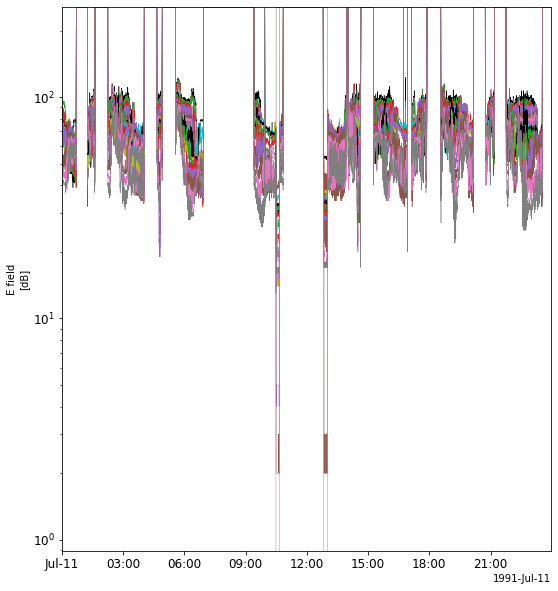

In [1]:
import load
import pytplot
import numpy as np
from pytplot import options
load.mca(trange=['1991-07-11', '1991-07-12'])

Emax = pytplot.get_data('Emax')
Emax.y
Bmax = pytplot.get_data('Bmax')
type(Emax.y)
pytplot.tlimit(['1991-07-11 00:00:00', '1991-07-11 23:59:00'])
pytplot.tplot('Emax')

In [8]:
print(np.count_nonzero( Emax.y == 255))

19


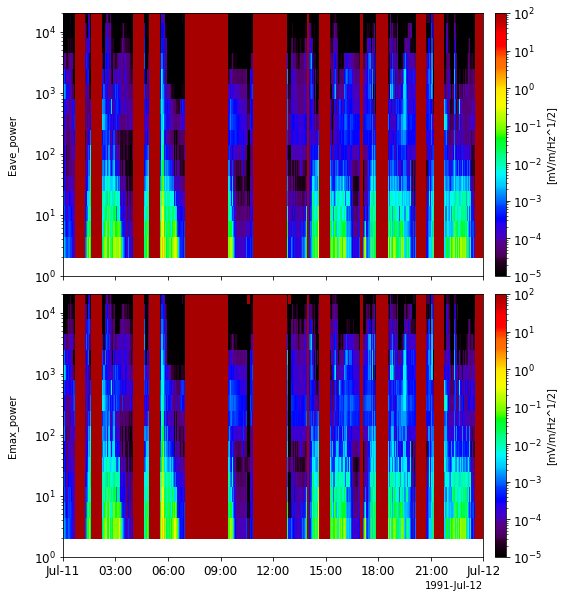

In [9]:
options(['Eave_power', 'Emax_power'], 'spec', 1)
options(['Eave_power', 'Emax_power'], 'ylog', 1)
options(['Eave_power', 'Emax_power'], 'zlog', 1)
options(['Eave_power', 'Emax_power'], 'zrange', [1e-5, 100])
options(['Eave_power', 'Emax_power'], 'yrange', [1, 2e4])
options(['Eave_power', 'Emax_power'], 'ztitle', '[mV/m/Hz^1/2]')
pytplot.tplot(['Eave_power', 'Emax_power'])

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <ipython-input-40-09691759de28>:28: DeprecationWarning: invalid escape sequence \s
  plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')



Text(0, 0.5, '')

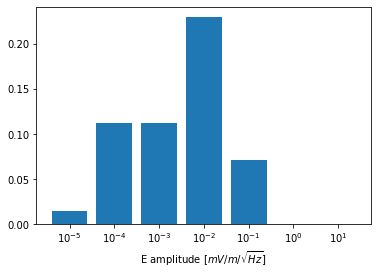

In [40]:
Emax = pytplot.get_data('Emax_amplitude')
Emax_T = Emax.y.T
Emax_1ch = Emax_T[0]
Emax_25dB = (10**(253/20)) * (1e-6)  / np.sqrt(3.16*0.3)

left = np.arange(7)
Emax_amp_0 = Emax_1ch.size
Emax_amp_1 = Emax_1ch[Emax_1ch < 1e1].size 
Emax_amp_2 = Emax_1ch[Emax_1ch < 1].size
Emax_amp_3 = Emax_1ch[Emax_1ch < 1e-1].size
Emax_amp_4 = Emax_1ch[Emax_1ch < 1e-2].size
Emax_amp_5 = Emax_1ch[Emax_1ch < 1e-3].size
Emax_amp_6 = Emax_1ch[Emax_1ch < 1e-4].size
Emax_amp_25dB = Emax_1ch[Emax_1ch > Emax_25dB].size
Emax_seconds = np.array([Emax_amp_6/Emax_amp_0,
               (Emax_amp_5-Emax_amp_6)/Emax_amp_0, 
               (Emax_amp_4-Emax_amp_5)/Emax_amp_0, 
               (Emax_amp_3-Emax_amp_4)/Emax_amp_0, 
               (Emax_amp_2-Emax_amp_3)/Emax_amp_0, 
               (Emax_amp_1-Emax_amp_2)/Emax_amp_0,
               (Emax_amp_0-Emax_amp_1-Emax_amp_25dB)/Emax_amp_0])


import matplotlib.pyplot as plt
labels = ['$10^{-5}$', '$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^0$','$10^1$']
plt.figure()
plt.bar(left, Emax_seconds, tick_label = labels)
plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')
plt.ylabel('')

In [14]:
import numpy as np
import pytplot
import pyspedas
omni_data = pyspedas.omni.data()
IMFx_tvar = pytplot.get_data('BX_GSE')
IMFy_tvar = pytplot.get_data('BY_GSM')
IMFz_tvar = pytplot.get_data('BZ_GSM')

time = IMFx_tvar.times
IMFx = IMFx_tvar.y
IMFy = IMFy_tvar.y
IMFz = IMFz_tvar.y

IMF_matrix = [IMFx,
              IMFy,
              IMFz]
IMF_matrix = np.array(IMF_matrix).T
pytplot.store_data('IMF', data = {'x':time, 'y':IMF_matrix})

13-Jul-22 17:39:18: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2013/
13-Jul-22 17:39:20: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2013/omni_hro2_1min_20131101_v01.cdf to omni_data/hro2_1min/2013/omni_hro2_1min_20131101_v01.cdf
13-Jul-22 17:41:24: Download complete: omni_data/hro2_1min/2013/omni_hro2_1min_20131101_v01.cdf


Time clip was applied to: IMF
Time clip was applied to: PLS
Time clip was applied to: IMF_PTS
Time clip was applied to: PLS_PTS
Time clip was applied to: percent_interp
Time clip was applied to: Timeshift
Time clip was applied to: RMS_Timeshift
Time clip was applied to: RMS_phase
Time clip was applied to: Time_btwn_obs
Time clip was applied to: F
Time clip was applied to: BX_GSE
Time clip was applied to: BY_GSE
Time clip was applied to: BZ_GSE
Time clip was applied to: BY_GSM
Time clip was applied to: BZ_GSM
Time clip was applied to: RMS_SD_B
Time clip was applied to: RMS_SD_fld_vec
Time clip was applied to: flow_speed
Time clip was applied to: Vx
Time clip was applied to: Vy
Time clip was applied to: Vz
Time clip was applied to: proton_density
Time clip was applied to: T
Time clip was applied to: NaNp_Ratio
Time clip was applied to: Pressure
Time clip was applied to: E
Time clip was applied to: Beta
Time clip was applied to: Mach_num
Time clip was applied to: Mgs_mach_num
Time clip wa

True

In [15]:
pytplot.tplot_names()

0 : variable1
1 : variable2
2 : new_variable  data from:  variable2
3 : IMF
4 : PLS
5 : IMF_PTS
6 : PLS_PTS
7 : percent_interp
8 : Timeshift
9 : RMS_Timeshift
10 : RMS_phase
11 : Time_btwn_obs
12 : F
13 : BX_GSE
14 : BY_GSE
15 : BZ_GSE
16 : BY_GSM
17 : BZ_GSM
18 : RMS_SD_B
19 : RMS_SD_fld_vec
20 : flow_speed
21 : Vx
22 : Vy
23 : Vz
24 : proton_density
25 : T
26 : NaNp_Ratio
27 : Pressure
28 : E
29 : Beta
30 : Mach_num
31 : Mgs_mach_num
32 : x
33 : y
34 : z
35 : BSN_x
36 : BSN_y
37 : BSN_z
38 : AE_INDEX
39 : AL_INDEX
40 : AU_INDEX
41 : SYM_D
42 : SYM_H
43 : ASY_D
44 : ASY_H


['variable1',
 'variable2',
 'new_variable  data from:  variable2',
 'IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'NaNp_Ratio',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H']

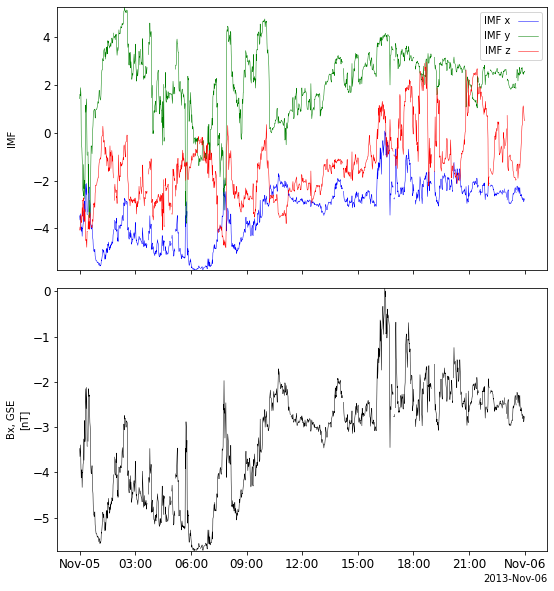

In [19]:
pytplot.options('IMF', 'legend_names', ['IMF x', "IMF y", "IMF z"])
pytplot.tplot(['IMF', 'BX_GSE'], display = True)